In [40]:
import pandas as pd
import numpy as np

In [41]:
df = pd.read_csv("train.csv")
# if dataset has nan values then fill it with mean of that column
df = df.fillna(df.mean())

In [42]:
df.head(5)

,open,high,low,close,return,volatility,volume,prev volume,next month return sign
0,1,1.025595,1.000000,1.018723,0.036807,0.086790,4398500,4009100.0,1
1,1,1.066588,1.000000,1.066572,0.076164,0.141086,12077600,13004600.0,0
2,1,1.044670,0.972615,0.972615,-0.024128,0.162615,13119900,12077600.0,1
3,1,1.089809,1.000000,1.089809,0.094817,0.145533,3840600,4485900.0,0
4,1,1.032791,0.970420,0.995200,0.012631,0.199212,9886800,14313900.0,0


In [43]:
# make a column diff_high_low which is the difference between high and low
df['diff_high_low'] = df['high'] - df['low']
df['diff_open_close'] = df['open'] - df['close']
df['ratio_currvol_prevvol']=df['volume']/df['prev volume']
df['diff_high_close']=(df['high']-df['close'])/(df['low']-df['close'])
df['diff_high_close'].fillna(df['diff_high_close'].mean(), inplace=True)
# drop columns high , low , open , close , volume , prev volume
df.drop(['high','low','open','close','volume','prev volume'],axis=1,inplace=True)
df.head(5)

,return,volatility,next month return sign,diff_high_low,diff_open_close,ratio_currvol_prevvol,diff_high_close
0,0.036807,0.086790,1,0.025595,-0.018723,1.097129,-0.367038
1,0.076164,0.141086,0,0.066588,-0.066572,0.928718,-0.000229
2,-0.024128,0.162615,1,0.072055,0.027385,1.086300,inf
3,0.094817,0.145533,0,0.089809,-0.089809,0.856149,-0.000000
4,0.012631,0.199212,0,0.062371,0.004800,0.690713,-1.516948


<AxesSubplot:>

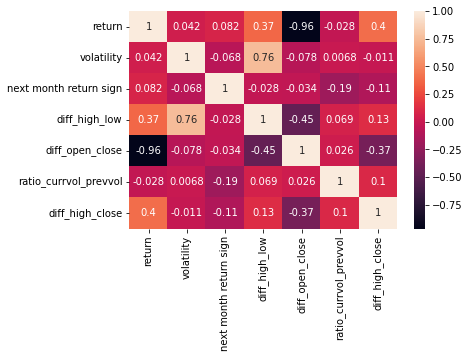

In [44]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [45]:
X=df[['diff_high_close','return','volatility','diff_high_low','diff_open_close','ratio_currvol_prevvol']]
y=df['next month return sign']
# X = scaler.fit_transform(X)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [47]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint


In [48]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [49]:
rf = RandomForestClassifier()
# rf.fit(X, y)
X_train.fillna(X_train.mean(), inplace=True)
rf.fit(X_train, y_train)

b:\Downloads\2023\nqc\lib\site-packages\pandas\core\series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [ ]:
print(X_test)
y_pred = rf.predict(X_test)

      return  volatility  diff_high_low  diff_open_close  \
63 -0.016133    0.163093       0.056926         0.026590   
11  0.014340    0.082762       0.026884        -0.007166   
7   0.021214    0.133718       0.036162        -0.013855   
41 -0.063962    0.210594       0.085365         0.043232   
42  0.028883    0.150187       0.069411        -0.045531   
13 -0.048928    0.141955       0.059590         0.047568   
38  0.009064    0.069355       0.018902        -0.009416   
53 -0.001204    0.134142       0.054522         0.006495   
16 -0.065412    0.250639       0.093269         0.066926   
48  0.060431    0.090269       0.059828        -0.051661   
55  0.017417    0.107479       0.027945        -0.017328   
9   0.073304    0.150471       0.083461        -0.061687   
5  -0.035467    0.132233       0.062483         0.031931   
43  0.028445    0.086449       0.043521        -0.029464   
22  0.052269    0.141941       0.039918        -0.033800   
15  0.015730    0.111409       0.018099 

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

ValueError: Found input variables with inconsistent numbers of samples: [24, 21]

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[11  0]
 [ 0 10]]


In [ ]:
# read test file
test_df = pd.read_csv("test_data.csv")
# if dataset has nan values then fill it with mean of that column
test_df = test_df.fillna(test_df.mean())

# make same transformations on test data
test_df['diff_high_low'] = test_df['high'] - test_df['low']
test_df['diff_open_close'] = test_df['open'] - test_df['close']
test_df['ratio_currvol_prevvol']=test_df['volume']/test_df['prev volume']
df['diff_high_close']=(df['high']-df['close'])/(df['low']-df['close'])
# drop columns high , low , open , close , volume , prev volume
test_df.drop(['high','low','open','close','volume','prev volume'],axis=1,inplace=True)

# make same transformations on test data
test_df=test_df[['diff_high_close','return','volatility','diff_high_low','diff_open_close','ratio_currvol_prevvol']]
# make predictions on test data
# test_df=scaler.fit_transform(test_df)
test_predictions = rf.predict(test_df)
# save predictions in a csv file
final_predictions = pd.DataFrame(test_predictions)
final_predictions.to_csv("predictions.csv",index=False)
print(test_df)

FileNotFoundError: [Errno 2] No such file or directory: 'test_data.csv'